## Importing Important Items

Libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset

In [112]:
movies = pd.read_csv("datasets/TMDB_IMDB Movies Dataset.csv")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434437 entries, 0 to 434436
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    434437 non-null  int64  
 1   title                 434437 non-null  object 
 2   vote_average          434437 non-null  float64
 3   vote_count            434437 non-null  int64  
 4   status                434437 non-null  object 
 5   release_date          415357 non-null  object 
 6   revenue               434437 non-null  int64  
 7   runtime               434437 non-null  int64  
 8   adult                 434437 non-null  bool   
 9   backdrop_path         184278 non-null  object 
 10  budget                434437 non-null  int64  
 11  homepage              54333 non-null   object 
 12  tconst                434437 non-null  object 
 13  original_language     434437 non-null  object 
 14  original_title        434437 non-null  object 
 15  

In [113]:
cols = ['id','title','release_date','overview','genres','original_language','keywords','cast','directors','writers','poster_path']
movies[cols].head()

,id,title,release_date,overview,genres,original_language,keywords,cast,directors,writers,poster_path
0,27205,Inception,2010-07-15,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",en,"rescue, mission, dream, airplane, paris, franc...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...",Christopher Nolan,Christopher Nolan,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,2014-11-05,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",en,"rescue, future, spacecraft, race against time,...","Matthew McConaughey, Anne Hathaway, Michael Ca...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,2008-07-16,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",en,"joker, sadism, chaos, secret identity, crime f...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,2009-12-15,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",en,"future, society, culture clash, space travel, ...","Sam Worthington, Zoe Saldaña, Sigourney Weaver...",James Cameron,James Cameron,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,2012-04-25,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",en,"new york city, superhero, shield, based on com...","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Joss Whedon,"Joss Whedon, Zak Penn",/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


In [114]:
movies[cols].isnull().sum()

id                        0
title                     0
release_date          19080
overview              41881
genres                78181
original_language         0
keywords             263675
cast                  68578
directors             10263
writers               66528
poster_path           74954
dtype: int64

## Data Cleaning

In [132]:
df = movies[cols]
df.head()

,id,title,release_date,overview,genres,original_language,keywords,cast,directors,writers,poster_path
0,27205,Inception,2010-07-15,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",en,"rescue, mission, dream, airplane, paris, franc...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...",Christopher Nolan,Christopher Nolan,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,2014-11-05,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",en,"rescue, future, spacecraft, race against time,...","Matthew McConaughey, Anne Hathaway, Michael Ca...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,2008-07-16,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",en,"joker, sadism, chaos, secret identity, crime f...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,2009-12-15,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",en,"future, society, culture clash, space travel, ...","Sam Worthington, Zoe Saldaña, Sigourney Weaver...",James Cameron,James Cameron,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,2012-04-25,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",en,"new york city, superhero, shield, based on com...","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Joss Whedon,"Joss Whedon, Zak Penn",/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


In [116]:
na_drop = ['release_date','overview','genres','original_language','poster_path']

In [133]:
df = df.dropna(subset=na_drop)
print(df.isna().sum())

print('/n')
print(df['id'].duplicated().sum())

id                        0
title                     0
release_date              0
overview                  0
genres                    0
original_language         0
keywords             144250
cast                  27156
directors              4678
writers               34692
poster_path               0
dtype: int64
/n
880


In [134]:
df = df.fillna('')
print(df.isna().sum())

id                   0
title                0
release_date         0
overview             0
genres               0
original_language    0
keywords             0
cast                 0
directors            0
writers              0
poster_path          0
dtype: int64


In [135]:
duplicate_ids = df[df['id'].duplicated(keep=False)]
duplicate_ids.head(10)

,id,title,release_date,overview,genres,original_language,keywords,cast,directors,writers,poster_path
6030,452522,Twin Peaks,1989-09-28,An idiosyncratic FBI agent investigates the mu...,"Crime, Drama, Mystery, TV Movie",en,"investigation, grief, murder, murder investiga...","Kyle MacLachlan, Michael Ontkean, Mädchen Amic...",David Lynch,"Mark Frost, David Lynch",/Apg4fMfr1Wi19Ilu5HXh4nClCv9.jpg
6031,452522,Twin Peaks,1989-09-28,An idiosyncratic FBI agent investigates the mu...,"Crime, Drama, Mystery, TV Movie",en,"investigation, grief, murder, murder investiga...",,David Lynch,"Mark Frost, David Lynch",/Apg4fMfr1Wi19Ilu5HXh4nClCv9.jpg
7420,13989,24: Redemption,2008-11-23,Former federal agent Jack Bauer confronts Afri...,"Action, Adventure, Crime",en,based on tv series,,Jon Cassar,"Joel Surnow, Robert Cochran, Howard Gordon",/41dppdIxokjEPPmppEq11Id2LGR.jpg
7421,13989,24: Redemption,2008-11-23,Former federal agent Jack Bauer confronts Afri...,"Action, Adventure, Crime",en,based on tv series,"Kiefer Sutherland, Cherry Jones, Bob Gunton, C...",Jon Cassar,"Joel Surnow, Robert Cochran, Howard Gordon",/41dppdIxokjEPPmppEq11Id2LGR.jpg
7422,13989,24: Redemption,2008-11-23,Former federal agent Jack Bauer confronts Afri...,"Action, Adventure, Crime",en,based on tv series,"Kiefer Sutherland, Cherry Jones, Bob Gunton, C...",Jon Cassar,"Joel Surnow, Robert Cochran, Howard Gordon",/41dppdIxokjEPPmppEq11Id2LGR.jpg
7423,13989,24: Redemption,2008-11-23,Former federal agent Jack Bauer confronts Afri...,"Action, Adventure, Crime",en,based on tv series,"Kiefer Sutherland, Cherry Jones, Bob Gunton, C...",Jon Cassar,"Joel Surnow, Robert Cochran, Howard Gordon",/41dppdIxokjEPPmppEq11Id2LGR.jpg
7424,13989,24: Redemption,2008-11-23,Former federal agent Jack Bauer confronts Afri...,"Action, Adventure, Crime",en,based on tv series,"Kiefer Sutherland, Robert Carlyle, Cherry Jone...",Jon Cassar,"Joel Surnow, Robert Cochran, Howard Gordon",/41dppdIxokjEPPmppEq11Id2LGR.jpg
11402,327029,Power/Rangers,2015-02-24,The Machine Empire defeats the Power Rangers i...,"Action, Science Fiction",en,,,Joseph Kahn,"Joseph Kahn, James Van Der Beek, Dutch Souther...",/yZjqMc3PsnuoPKWDVcD0sggYXUF.jpg
11403,327029,Power/Rangers,2015-02-24,The Machine Empire defeats the Power Rangers i...,"Action, Science Fiction",en,,"Katee Sackhoff, James Van Der Beek, Russ Bain,...",Joseph Kahn,"Joseph Kahn, James Van Der Beek, Dutch Souther...",/yZjqMc3PsnuoPKWDVcD0sggYXUF.jpg
11404,327029,Power/Rangers,2015-02-24,The Machine Empire defeats the Power Rangers i...,"Action, Science Fiction",en,,"Katee Sackhoff, James Van Der Beek, Russ Bain,...",Joseph Kahn,"Joseph Kahn, James Van Der Beek, Dutch Souther...",/yZjqMc3PsnuoPKWDVcD0sggYXUF.jpg


In [136]:
# Drop Duplicate Id 
df.drop_duplicates(subset=['id'], inplace=True)
df.reset_index(drop=True, inplace=True)

#Check for anymore duplicates
print(df.duplicated().sum())

0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284980 entries, 0 to 284979
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 284980 non-null  int64 
 1   title              284980 non-null  object
 2   release_date       284980 non-null  object
 3   overview           284980 non-null  object
 4   genres             284980 non-null  object
 5   original_language  284980 non-null  object
 6   keywords           284980 non-null  object
 7   cast               284980 non-null  object
 8   directors          284980 non-null  object
 9   writers            284980 non-null  object
 10  poster_path        284980 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.9+ MB


## Data Validation

In [138]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

In [139]:
# Get 5 earliest movies (lowest years)
earliest_5 = df.nsmallest(5, 'release_year')[['title', 'release_year', 'release_date']]

# Get 5 most recent movies (highest years)
recent_5 = df.nlargest(5, 'release_year')[['title', 'release_year', 'release_date']]

print("5 Earliest Movies:")
print(earliest_5)
print("\n5 Most Recent Movies:")
print(recent_5)

5 Earliest Movies:
                     title  release_year release_date
19059     Passage of Venus          1874   1874-12-09
46668  The Musician Monkey          1878   1878-05-07
53316    The Magic Rosette          1878   1878-05-07
81987      Le Jeu de Corde          1878   1878-05-07
82015      Zim, Boum, Boum          1878   1878-05-07

5 Most Recent Movies:
                                      title  release_year release_date
222424                     Pela Adhi Akshar          2027   2027-03-24
255606                                  EFC          2025   2025-03-06
121011                              Foonote          2024   2024-02-14
152521                                GRUFF          2024   2024-03-01
161298  Agent Jayne: A Woman with a Mission          2024   2024-07-13


Decade distribution:


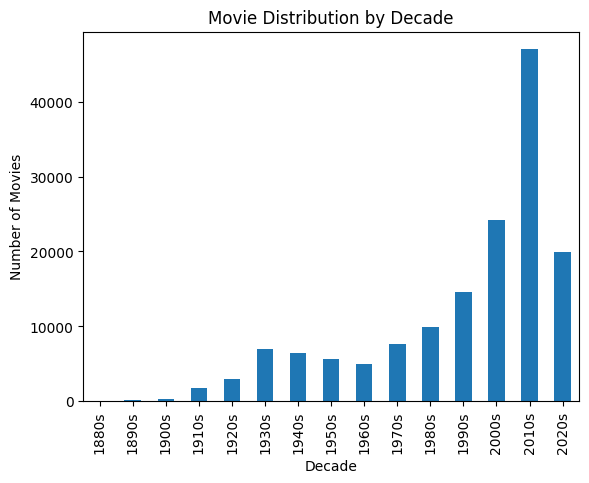

In [142]:
# Create decade column
df['decade'] = (df['release_year'] // 10) * 10
df['decade_label'] = df['decade'].astype(str) + 's'

# Show distribution
print("Decade distribution:")
decade_counts = df['decade_label'].value_counts().sort_index()
decade_counts.plot(kind='bar', xlabel='Decade', ylabel='Number of Movies', title='Movie Distribution by Decade')
plt.show()

In [143]:
# Subset the data to only include movies released between 1990 and 2025
df_released = df[(df['release_year'] >= 1990) & (df['release_year'] <= 2025)]
df_released.sort_values(by='release_year', ascending=False).head()

,id,title,release_date,overview,genres,original_language,keywords,cast,directors,writers,poster_path,release_year,decade,decade_label
136363,393897,EFC,2025-03-06,Riding off the heels of her sister Scarlett’s ...,Drama,en,"strong woman, female athlete, boxing, women fi...","Avaah Blackwell, Karlee Rose, Jaclyn Vogl, Sav...","Jaze Bordeaux, Wayne Wells","Ilham Aragrag, Jaze Bordeaux, Greg Jackson",/yDt4UrDKRsfg6v5hsYOUOL9vPN5.jpg,2025,2020,2020s
117941,1364638,Doc of Chucky,2024-11-01,The story of the cult horror empire through in...,Documentary,en,"movie business, behind the scenes, killer doll...","Autumn Ivy, Brad Dourif, Jennifer Tilly, Alex ...",Thommy Hutson,"Thommy Hutson, Mark Alan Miller",/qpWKKVPzZZe3fhnijgaYAQBalRk.jpg,2024,2020,2020s
92610,1313756,Old Man Junior,2024-07-06,"Morbius Jr, now an OId Man, is nearing the end...",Action,en,"grand, morbius, morbius cinematic universe, mo...","Josh McQueen, Michael Wingate, Nathan Levi, Co...",Bailee MCQueen,Bailee McQueen,/hZKm5M7J1JUE2dpHeLgf736rzDT.jpg,2024,2020,2020s
117914,1371579,Context,2024-10-06,A boss faces an unexpected evening after a pai...,Comedy,en,,"Karl Popow, Alec Toselli, Sebastian Per Stigh,...",Brent Kinetz,"Brent Kinetz, Abhinav Neelam",/iLu1zF3Q134UXcdI6JP5HMvkCYu.jpg,2024,2020,2020s
117908,1373796,Blackstone,2024-04-01,"""Black Stone"" is an exciting new superhero mov...","Science Fiction, Thriller, Adventure, Action",en,,,Shahriar Galib,Shahriar Galib,/1XiJZgBiA3BE14RFjCoIbk2HIeC.jpg,2024,2020,2020s


Decade distribution:


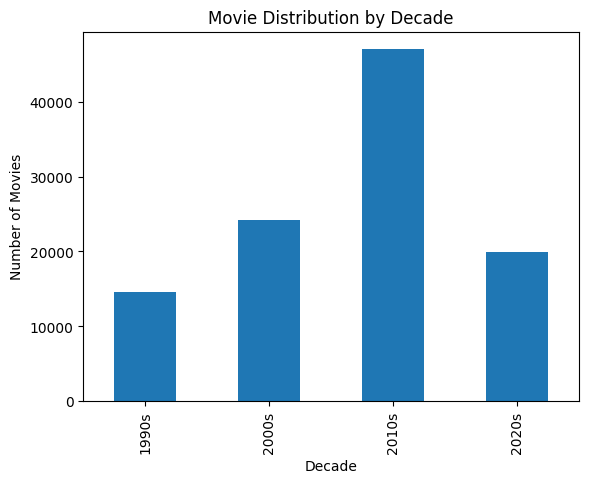

In [151]:
# Create decade column
df_released['decade'] = (df_released['release_year'] // 10) * 10
df_released['decade_label'] = df_released['decade'].astype(str) + 's'

# Show distribution
print("Decade distribution:")
decade_counts = df_released['decade_label'].value_counts().sort_index()
decade_counts.plot(kind='bar', xlabel='Decade', ylabel='Number of Movies', title='Movie Distribution by Decade')
plt.show()

In [145]:
df_released.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105674 entries, 0 to 152266
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 105674 non-null  int64         
 1   title              105674 non-null  object        
 2   release_date       105674 non-null  datetime64[ns]
 3   overview           105674 non-null  object        
 4   genres             105674 non-null  object        
 5   original_language  105674 non-null  object        
 6   keywords           105674 non-null  object        
 7   cast               105674 non-null  object        
 8   directors          105674 non-null  object        
 9   writers            105674 non-null  object        
 10  poster_path        105674 non-null  object        
 11  release_year       105674 non-null  int32         
 12  decade             105674 non-null  int32         
 13  decade_label       105674 non-null  object       

### Subsetting for English Movies

In [ ]:
# Check what status values exist
print("Available Languages:")
print(df_released['original_language'].value_counts())

Available Languages:
original_language
en    71464
fr     6107
ja     5341
es     5193
de     4023
      ...  
ny        1
ty        1
so        1
gn        1
lg        1
Name: count, Length: 133, dtype: int64


In [146]:
# Then filter
df = df[df['original_language'] == 'en'].reset_index(drop=True)

# Check after filtering
print("Available AFter filtering")
df[['original_language']].value_counts()

Available AFter filtering


original_language
en                   152267
Name: count, dtype: int64

### Column Extraction


In [148]:
# Create df2
df2 = df_released[['id','title','overview','genres','keywords','cast','directors','writers','poster_path']].copy()

In [149]:
df2.head()

,id,title,overview,genres,keywords,cast,directors,writers,poster_path
0,27205,Inception,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...",Christopher Nolan,Christopher Nolan,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...","Matthew McConaughey, Anne Hathaway, Michael Ca...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...","Sam Worthington, Zoe Saldaña, Sigourney Weaver...",James Cameron,James Cameron,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Joss Whedon,"Joss Whedon, Zak Penn",/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


## Preprocessing Steps

### Stemming "Overview" Column

In [36]:
from nltk.stem.porter import PorterStemmer
import re

# Initialize stemmer
ps = PorterStemmer()

def clean_and_stem_overview(text):
    """
    Clean and stem the overview text
    """
    # Remove years (optional - you can keep if you want temporal context)
    text = re.sub(r'\b(19[0-9]{2}|20[0-9]{2})\b', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation (optional)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Split into words and stem each word
    words = text.split()
    stemmed_words = [ps.stem(word) for word in words]
    
    # Join back into a single string
    return ' '.join(stemmed_words)

In [37]:
# Apply to overview column
df2['overview_stemmed'] = df2['overview'].apply(clean_and_stem_overview)

# Preview the new column
df2['overview_stemmed'].head()

0    cobb a skill thief who commit corpor espionag ...
1    the adventur of a group of explor who make use...
2    batman rais the stake in hi war on crime with ...
3    in the 22nd centuri a parapleg marin is dispat...
4    when an unexpect enemi emerg and threaten glob...
Name: overview_stemmed, dtype: object

### Preprocessig for other text columns

In [26]:
def clean_text(text):
    """
    Convert text to lowercase and strip whitespace
    """
    if pd.isna(text):
        return ""
    
    return str(text).lower().strip()

In [29]:
# Define text columns to clean
text_columns = ['genres', 'keywords', 'directors','cast','writers']

# Apply cleaning function to all text columns
for col in text_columns:
    df2[col] = df2[col].apply(clean_text)

# Preview cleaned data
print(df2[text_columns].head())

                                        genres  \
0           action, science fiction, adventure   
1            adventure, drama, science fiction   
2               drama, action, crime, thriller   
3  action, adventure, fantasy, science fiction   
4           science fiction, action, adventure   

                                            keywords          directors  \
0  rescue, mission, dream, airplane, paris, franc...  christopher nolan   
1  rescue, future, spacecraft, race against time,...  christopher nolan   
2  joker, sadism, chaos, secret identity, crime f...  christopher nolan   
3  future, society, culture clash, space travel, ...      james cameron   
4  new york city, superhero, shield, based on com...        joss whedon   

                                                cast  \
0  leonardo dicaprio, joseph gordon-levitt, ken w...   
1  matthew mcconaughey, anne hathaway, michael ca...   
2  christian bale, heath ledger, aaron eckhart, m...   
3  sam worthington, zoe 

### Creating the Soup

In [32]:
df2['soup'] = df2['genres'] + ' ' + df2['cast'].iloc[:3]+ ' '  + df2['directors']  + ' ' + df2['writers'].iloc[:3] + ' '  + df2['keywords'] + ' ' + df2['overview_stemmed']
df2['soup'].head()

0    action, science fiction, adventure leonardo di...
1    adventure, drama, science fiction matthew mcco...
2    drama, action, crime, thriller christian bale,...
3                                                  NaN
4                                                  NaN
Name: soup, dtype: object

In [140]:
df2['soup'].iloc[0]

'action, science fiction, adventure rescue, mission, dream, airplane, paris, france, virtual reality, kidnapping, philosophy, spy, allegory, manipulation, car crash, heist, memory, architecture, los angeles, california, dream world, subconscious cobb a skill thief who commit corpor espionag by infiltr the subconsci of hi target is offer a chanc to regain hi old life as payment for a task consid to be imposs incept the implant of anoth person idea into a target subconsci 2010s'

## Modelling

### Vectorization Steps

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    min_df=10,      
    max_df=0.8,       # drop terms in ≥75% of the movies
    max_features=15000,             # Keep top 15,000 features
    ngram_range=(1, 2),            # Use unigrams and bigrams
)

X_tfidf = tfidf.fit_transform(df2['soup'].fillna(''))

In [142]:
X_tfidf.shape

(140092, 15000)

In [143]:
print(tfidf.get_feature_names_out()[:300])  # See what words are being used

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '10 year' '100'
 '100 year' '1000' '10000' '100000' '100th' '10th' '10th anniversari'
 '10yearold' '11' '11 year' '11th' '11yearold' '12' '12 year' '120' '12th'
 '12yearold' '13' '13 year' '13th' '13yearold' '14' '14 year' '1453'
 '14th' '14yearold' '15' '15 year' '150' '15th' '15yearold' '16' '16 year'
 '16mm' '16mm film' '16th' '16th century' '16yearold' '17' '17 year'
 '17th' '17th centuri' '17th century' '17yearold' '18' '18 year' '1800'
 '1890' '18th' '18th centuri' '18th century' '18yearold' '19' '19 short'
 '19 year' '1900s' '1910s' '1920' '1920s' '1930' '1930s' '1936' '1936 39'
 '1940' '1940s' '1950' '1950s' '1960' '1960s' '1970' '1970s' '1980'
 '1980s' '1990' '1990s' '1992' '1992 95' '19th' '19th centuri'
 '19th century' '19yearold' '1st' '20' '20 year' '200' '2000' '20000'
 '2000s' '2010s' '2020s' '20th' '20th anniversari' '20th centuri'
 '20yearold' '21' '21st' '21st centuri' '22' '22nd' '23' '23 year' '23rd'
 '24' '24 hour'

In [144]:
#Construct a reverse map of indices and movie titles
df2 = df2.reset_index(drop=True)
df2['title_lower'] = df2['title'].str.lower().str.strip()
indices = pd.Series(df2['id'].values, index=df2['title_lower']).drop_duplicates()

In [145]:
indices.head()

title_lower
inception           27205
interstellar       157336
the dark knight       155
avatar              19995
the avengers        24428
dtype: int64

### Model Function Creation

In [146]:
from sklearn.neighbors import NearestNeighbors
import difflib

# 1. Fit the NearestNeighbors model (do this once)
#    We ask for 11 neighbours: movie itself + 10 closest others
nn = NearestNeighbors(
    n_neighbors=11,
    metric='cosine',
    algorithm='brute',
    n_jobs=-1
)
nn.fit(X_tfidf)   # X_tfidf is your TF–IDF sparse matrix

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=11)

In [147]:
def get_recommendations(movie_title, nn_model=nn, tfidf_matrix=X_tfidf, df=df2, indices=indices, min_similarity=0.6):
    """
    Get 10 movie recommendations based on a movie title.
    
    Parameters:
    - movie_title: String, the title of the movie to find recommendations for
    - nn_model: Fitted NearestNeighbors model
    - tfidf_matrix: TF-IDF matrix used for training
    - df: DataFrame containing movie data
    - indices: Series mapping movie titles to IDs
    - min_similarity: Minimum similarity threshold for auto-correction
    
    Returns:
    - List of 10 recommended movie titles
    """
    # Normalize the input title
    key = movie_title.lower().strip()
    
    # Check if the title exists in our index
    if key not in indices.index:
        # Try to auto-correct using difflib
        close_matches = difflib.get_close_matches(key, indices.index, n=1, cutoff=min_similarity)
        
        if close_matches:
            corrected_key = close_matches[0]
            corrected_movie_id = indices[[corrected_key]].iloc[0]
            
            # Get the corrected movie title
            corrected_title = df[df['id'] == corrected_movie_id]['title'].iloc[0]
            print(f"Title '{movie_title}' not found. Using closest match: '{corrected_title}'")
            
            key = corrected_key
        else:
            raise KeyError(f"Movie title '{movie_title}' not found and no close match available.")
    
    # Get the movie ID for the title
    movie_id = indices[[key]].iloc[0]
    
    # Find the row index in the DataFrame
    movie_row = df[df['id'] == movie_id]
    if len(movie_row) == 0:
        raise KeyError(f"Movie with ID {movie_id} not found in DataFrame.")
    
    row_idx = movie_row.index[0]
    
    # Get the TF-IDF vector for this movie
    movie_vector = tfidf_matrix[row_idx]
    
    # Find the 11 nearest neighbors (including the movie itself)
    distances, neighbor_indices = nn_model.kneighbors(movie_vector, return_distance=True)
    
    # Remove the first neighbor (it's the movie itself) and get the next 10
    recommended_indices = neighbor_indices[0][1:11]  # Get indices 1-10
    
    # Get the recommended movie titles
    recommended_movies = df.iloc[recommended_indices]['title'].tolist()
    
    return recommended_movies

In [148]:
# Example usage
get_recommendations("Spiderman")

Title 'Spiderman' not found. Using closest match: 'Spider-Man'


['Spider-Man 2',
 'Spider-Man: Across the Spider-Verse',
 'Spider-Man 3',
 'Spider-Man: No Way Home',
 'Spider-Man: Across the Spider-Verse: Across the Comics-Verse',
 'Spider-Man: Across the Spider-Verse: Escape from Spider-Society',
 'Spider-Man: Across the Spider-Verse: Designing Spiders and Spots',
 'Spider-Man: Across the Spider-Verse: Raising a Hero',
 'Spider-Man: Across the Spider-Verse: "I\'mma Do My Own Thing" - Interdimensional Destiny',
 'Spider-Man: Across the Spider-Verse: Across the Worlds: Designing New Dimensions']

## Saving Datasets as Pickle Files

In [149]:
df3 = df2[['id', 'title','overview', 'genres', 'release_year', 'title_lower', 'poster_path']]
df3.head()

,id,title,overview,genres,release_year,title_lower,poster_path
0,27205,Inception,"Cobb, a skilled thief who commits corporate es...","action, science fiction, adventure",2010,inception,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,The adventures of a group of explorers who mak...,"adventure, drama, science fiction",2014,interstellar,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,"drama, action, crime, thriller",2008,the dark knight,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","action, adventure, fantasy, science fiction",2009,avatar,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,When an unexpected enemy emerges and threatens...,"science fiction, action, adventure",2012,the avengers,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


In [150]:
# Save/Update files as pickle files
# The Dataframe
import pickle

with open('Pkled Files/dataframe.pkl', 'wb') as f:
    pickle.dump(df3, f)

In [151]:
# The Indices
with open('Pkled Files/indices.pkl', 'wb') as f:
    pickle.dump(indices, f)

In [152]:
# The Tfidf Matrix
with open('Pkled Files/tfidf_matrix.pkl', 'wb') as f:
    pickle.dump(X_tfidf, f)